In [54]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

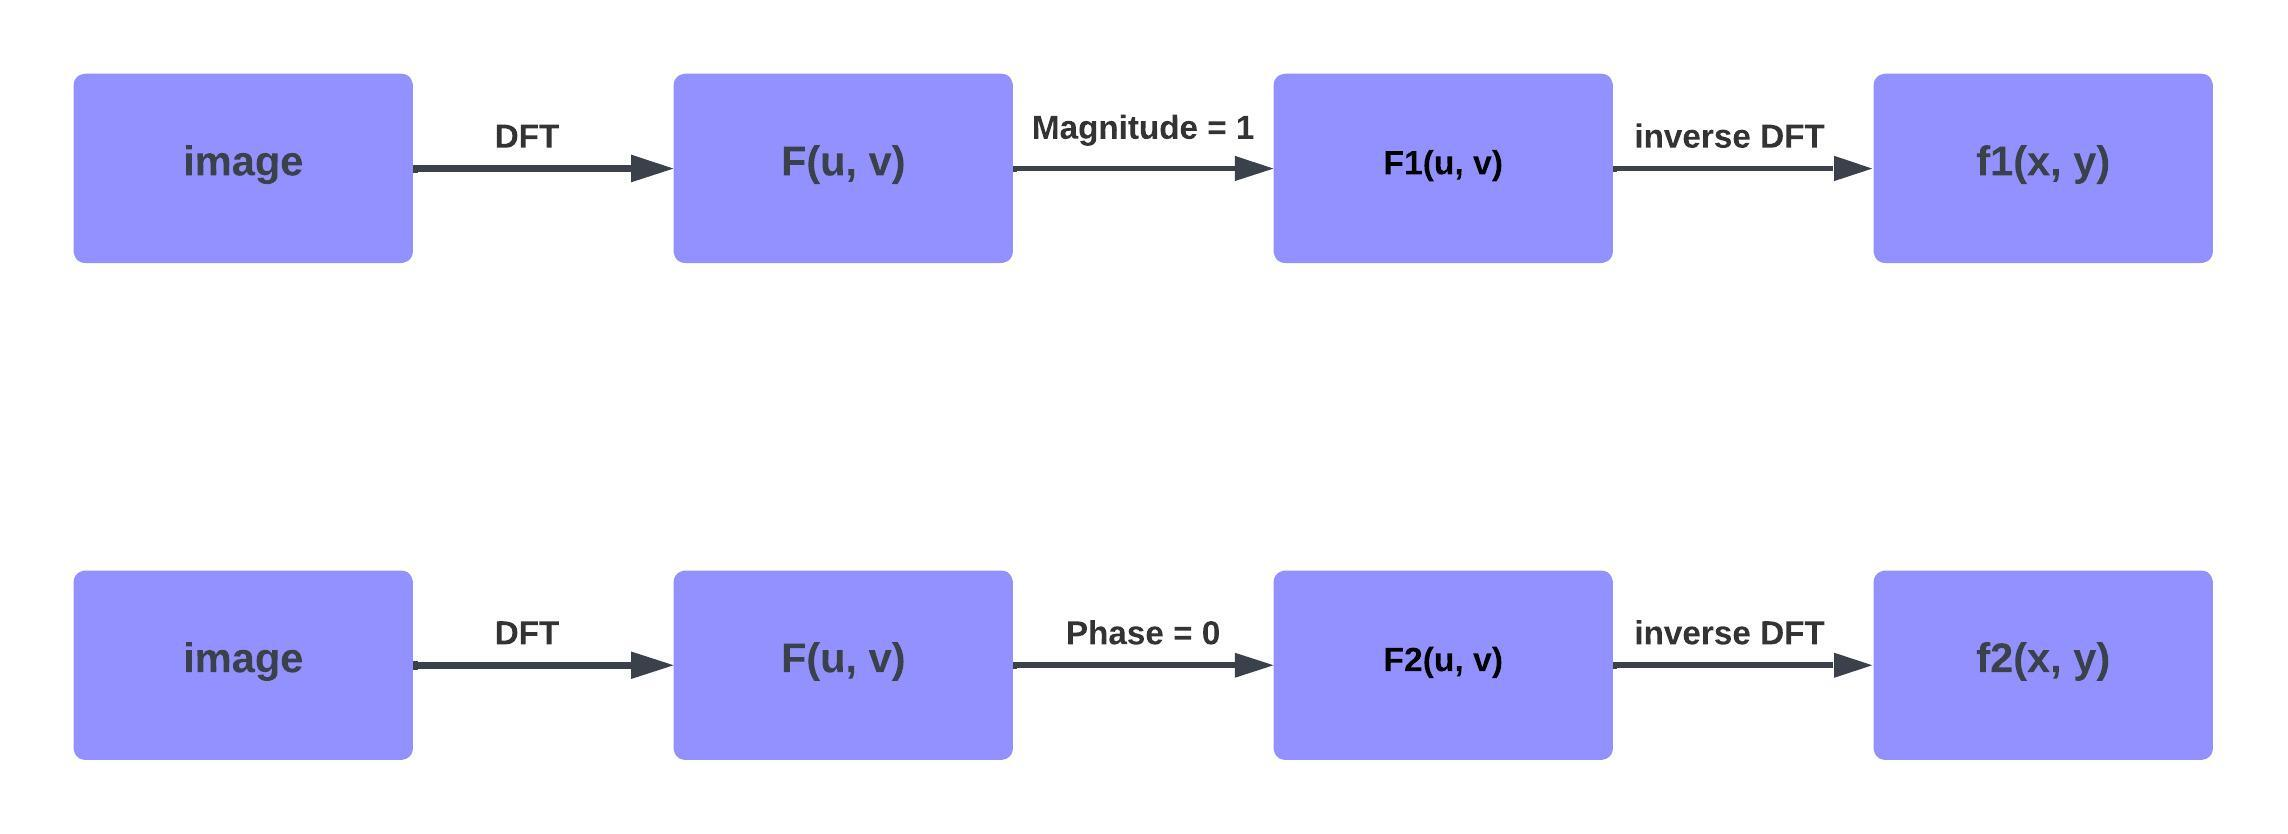

In [118]:
from IPython.display import Image
Image("block-diagram-1-a-b.jpeg")

### Problem-1 (Part-1):

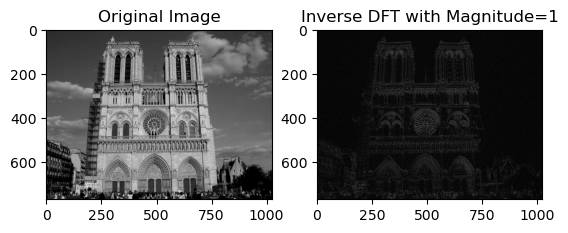

True

In [55]:
# Step 1: Load the image
image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Step 3: Modify the magnitude of the DFT to be 1
magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
magnitude = np.ones_like(magnitude)

# Step 4: Combine magnitude and phase
dft[:, :, 0], dft[:, :, 1] = cv2.polarToCart(magnitude, phase)

# Step 5: Compute the inverse DFT
inverse_dft = cv2.idft(dft)

# Extract the real part (as the imaginary part should be close to zero)
result_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

# Display the original and result images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_image, cmap='gray'), plt.title('Inverse DFT with Magnitude=1')
plt.show()

cv2.imwrite('P1-Q1.png', result_image)

# ref: https://github.com/AxelrodAdil/ImageProcessing

### Problem-1 (Part-2)

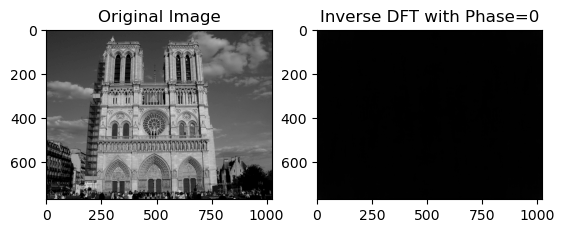

True

In [53]:
# Step 1: Load the image
image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# Step 2: Compute the DFT
dft = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)

# Step 3: Set the phase to 0
magnitude, phase = cv2.cartToPolar(dft[:, :, 0], dft[:, :, 1])
phase = np.zeros_like(phase)

# Step 4: Combine magnitude and phase
dft[:, :, 0], dft[:, :, 1] = cv2.polarToCart(magnitude, phase)

# Step 5: Compute the inverse DFT
inverse_dft = cv2.idft(dft)

# Extract the real part (as the imaginary part should be close to zero)
result_image = cv2.magnitude(inverse_dft[:, :, 0], inverse_dft[:, :, 1])

# Display the original and result images
plt.subplot(121), plt.imshow(image, cmap='gray'), plt.title('Original Image')
plt.subplot(122), plt.imshow(result_image, cmap='gray'), plt.title('Inverse DFT with Phase=0')
plt.show()

cv2.imwrite('P1-Q2.png', result_image)

# ref: https://github.com/AxelrodAdil/ImageProcessing

In [56]:
# inputPath = "origin-P1.png"
# outputPath = "h1-test.png"

# f1(inputPath, outputPath, magnitude=1)

In [57]:
v = [1, 2, 3, 4, 5]
print(v)

v = np.fft.fft(v)
print(v)

v = np.abs(v)
print(v)

v = np.ones_like(v)
print(v)

# ref: https://www.cuemath.com/questions/what-is-the-absolute-value-of-the-complex-number-4-2i-14-32-14-18/

[1, 2, 3, 4, 5]
[15. +0.j         -2.5+3.4409548j  -2.5+0.81229924j -2.5-0.81229924j
 -2.5-3.4409548j ]
[15.          4.25325404  2.62865556  2.62865556  4.25325404]
[1. 1. 1. 1. 1.]


### Problem-1 (Part-3) the similarity and differences of f1(x, y) and f2(x, y) relative to the original image:

- Magnitude Impact:

    - (Set Parameters) The problem-1 sets the magnitude to 1, creating a uniform magnitude spectrum; however, problem-2 leaves the magnitude unchanged.
  
    - Setting the magnitude of an image to 1 will have a significant impact on the image. `The image will lose all of its contrast and will appear as a uniform gray color.` This is because the magnitude of the Fourier transform of an image represents the contrast of the image. When the magnitude is set to 1, all of the frequency components of the image are given equal weight, which results in a uniform gray image.

  - In addition, the results in an image where all spatial frequencies have the same intensity.
  

- Phase Impact:
  - (Set Parameters) The problem-2 sets the phase to 0 for all frequencies, creating a uniform phase spectrum; however, problem-1 leaves the phase unchanged.
  
  - Setting the phase of an image to zero will also have a significant impact on the image. `The image will lose all of its spatial information and will appear as a random pattern of noise`. This is because the phase of the Fourier transform of an image represents the spatial arrangement of the image. When the phase is set to zero, all of the frequency components of the image are given the same phase, which results in a random pattern of noise.
  
  - In addition, the results in an image where all spatial frequencies have the same phase.
  

- Combined Impact on Image:
   - This operation essentially removes variations in amplitude across different frequencies, resulting in an image where all spatial frequencies contribute equally to the final pixel values.
   - The significance of such operations may be more apparent in specific applications, such as image processing or certain types of filtering in the frequency domain. These operations can be part of techniques like image normalization or manipulation of frequency components for specific effects.

### Problem-1 (Part-4)

In [112]:
def applyingFilters(inputPath, outputPath, customFilter, std=0.1):
    
    # Step 1: Load the image
    image = cv2.imread(inputPath)
    
    # Step 2: Convert "colored" to "gray"
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Step 3: Apply FFT: convert into frequency domain:
    fft = np.fft.fft2(image)

    # Step 4: Creates noise and adds it to the original image:
    noise = np.random.normal(loc=0.0, scale=std, size=(image.shape)) # mean=0, std = std
    noisyImage = fft + noise

    # Step 5: Apply inverser FFT on noisy image:
    noisyImage = np.fft.ifft2(noisyImage).real

    # Step 6: Apply "customFilter" on noisy image in spatial domain:
    reformedImage = cv2.filter2D(noisyImage, -1, customFilter)

    # Step 7: Normalizes the filter: the RGB should be within 0-255.
    reformedImage = cv2.normalize(reformedImage, None, 0, 255, cv2.NORM_MINMAX)
    
    
    # Saves image
    cv2.imwrite(outputPath, reformedImage)
#end-def

In [116]:
inputPath = "origin-P1.png"
outputPath = "P1-Q4-h2.png"

h1 = np.array([
     [0, -1/3, 0],
     [0, -1/6, 0],
     [0, 0, 0],
     [0, 1/6, 0],
     [0, 1/3, 0],
])

h2 = np.ones((5, 5)) / 25

applyingFilters(inputPath, outputPath, h1, std=0.1)

In [107]:
# help(np.random.normal)

#### ignore solution:

In [124]:
# import cv2
# import numpy as np

# # Define the original image
# original_image = cv2.imread('origin-P1.png', cv2.IMREAD_GRAYSCALE)

# # Generate noisy image
# noisy_image = original_image + np.random.normal(0, 0.1, original_image.shape)

# # Compute the Fourier transform of the noisy image
# noisy_dft = cv2.dft(noisy_image, cv2.DFT_COMPLEX_OUTPUT)

# # Define the h1 filter

# h1 = np.array([
#      [0, -1/3, 0],
#      [0, -1/6, 0],
#      [0, 0, 0],
#      [0, 1/6, 0],
#      [0, 1/3, 0],
# ])

# h2 = np.ones((5, 5)) / 25

# # Apply the h1 filter in the frequency domain
# filtered_dft_h1 = noisy_dft * cv2.dft(h1, cv2.DFT_COMPLEX_OUTPUT)

# # Apply the h2 filter in the frequency domain
# filtered_dft_h2 = noisy_dft * cv2.dft(h2, cv2.DFT_COMPLEX_OUTPUT)

# # Compute the inverse Fourier transform of the filtered DFTs
# filtered_image_h1 = np.fft.ifftn(filtered_dft_h1).real
# filtered_image_h2 = np.fft.ifftn(filtered_dft_h2).real

# # Display the filtered images, noisy image, and the original image
# cv2.imshow('Original Image', original_image)
# cv2.imshow('Noisy Image', noisy_image)
# cv2.imshow('Filtered Image (h1)', filtered_image_h1.astype(np.uint8))
# cv2.imshow('Filtered Image (h2)', filtered_image_h2.astype(np.uint8))

# # Display the filtered DFTs and noisy DFT
# cv2.imshow('Filtered DFT (h1)', np.log10(np.abs(filtered_dft_h1) + 1))
# cv2.imshow('Filtered DFT (h2)', np.log10(np.abs(filtered_dft_h2) + 1))
# cv2.imshow('Noisy DFT', np.log10(np.abs(noisy_dft) + 1))

# cv2.waitKey(0)

#### Problem-2:

In [123]:
# import cv2
# import numpy as np
# from scipy.signal import convolve2d

# # Step 1: Load the degraded image
# degraded_image = cv2.imread('P2-degradation.png', cv2.IMREAD_GRAYSCALE)

# # Step 2: Experiment with different blur kernels and noise levels
# # For example, try different kernel sizes and noise variances

# # Step 3: Use the Wiener filter formula to estimate the best filter parameters
# def estimate_wiener_filter(kernel, noise_variance):
#     kernel_fft = np.fft.fft2(kernel)
#     kernel_fft_conj = np.conj(kernel_fft)
#     filter_fft = np.divide(kernel_fft_conj, (np.abs(kernel_fft) ** 2 + noise_variance))
#     return np.fft.ifft2(filter_fft).real

# # Step 4: Apply the Wiener filter to restore the original image
# def wiener_filter(image, kernel, noise_variance):
#     image_fft = np.fft.fft2(image)
#     filter = estimate_wiener_filter(kernel, noise_variance)
#     restored_image_fft = np.multiply(image_fft, filter)
#     restored_image = np.fft.ifft2(restored_image_fft).real
#     return np.uint8(np.clip(restored_image, 0, 255))

# # Example: Using a uniform kernel and noise variance of 25 (you can experiment with different values)
# uniform_kernel = np.ones((5, 5), dtype=np.float32) / 25
# restored_image = wiener_filter(degraded_image, uniform_kernel, 25)

# # Step 5: Evaluate the restoration result using MSE
# def calculate_mse(original, restored):
#     return np.mean((original - restored) ** 2)

# # Assuming you have the original image (replace 'original_image.jpg' with the actual path)
# original_image = cv2.imread('P2-original.png', cv2.IMREAD_GRAYSCALE)

# mse = calculate_mse(original_image, restored_image)
# print(f'Mean Squared Error (MSE): {mse}')

# # Display the results
# cv2.imshow('Original Image', original_image)
# cv2.imshow('Degraded Image', degraded_image)
# cv2.imshow('Restored Image', restored_image)

(256, 256)
127.5


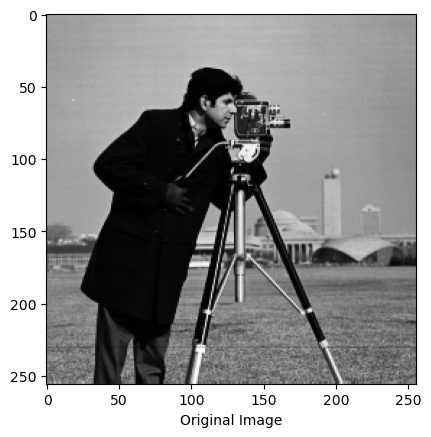

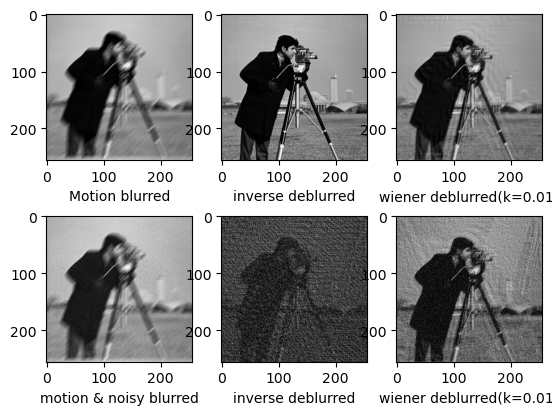

degraded: 1073.2363814239138
restored: 821.546680891038
restored: 821.546680891038	degraded: 1073.2363814239138


In [152]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import fft
import math
import cv2


# Simulated motion blur
def motion_process(image_size, motion_angle):
    PSF = np.zeros(image_size)
    print(image_size)
    center_position = (image_size[0] - 1) / 2
    print(center_position)

    slope_tan = math.tan(motion_angle * math.pi / 180)
    slope_cot = 1 / slope_tan
    if slope_tan <= 1:
        for i in range(15):
            offset = round(i * slope_tan)  # ((center_position-i)*slope_tan)
            PSF[int(center_position + offset), int(center_position - offset)] = 1
        return PSF / PSF.sum()  # Normalize the luminance of the point spread function
    else:
        for i in range(15):
            offset = round(i * slope_cot)
            PSF[int(center_position - offset), int(center_position + offset)] = 1
        return PSF / PSF.sum()
#end-def

# Blur the image with motion
def make_blurred(input, PSF, eps):
    input_fft = fft.fft2(input)  # Take the Fourier transform of a two-dimensional array
    PSF_fft = fft.fft2(PSF) + eps
    blurred = fft.ifft2(input_fft * PSF_fft)
    blurred = np.abs(fft.fftshift(blurred))
    return blurred
#end-def

def inverse(input, PSF, eps):  # Inverse filtering
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps  # Noise power, that's given，consider epsilon
    result = fft.ifft2(input_fft / PSF_fft)  # Compute the inverse Fourier transform of F(u,v)
    result = np.abs(fft.fftshift(result))
    return result
#end-def

def wiener(input, PSF, eps, K=0.01):  # Wiener filtering，K=0.01
    input_fft = fft.fft2(input)
    PSF_fft = fft.fft2(PSF) + eps
    PSF_fft_1 = np.conj(PSF_fft) / (np.abs(PSF_fft) ** 2 + K)
    result = fft.ifft2(input_fft * PSF_fft_1)
    result = np.abs(fft.fftshift(result))
    return result
#end-def

image = cv2.imread('P2-original.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)  # Convert to grayscale image
img_h = image.shape[0]
img_w = image.shape[1]

plt.figure(1)
plt.xlabel("Original Image")
plt.gray()
plt.imshow(image)  # Show the original image
plt.figure(2)
plt.gray()

# Motion blur
PSF = motion_process((img_h, img_w), 60)
blurred = np.abs(make_blurred(image, PSF, 1e-3))

# degraded = blurred.copy()


plt.subplot(231)
plt.xlabel("Motion blurred")
plt.imshow(blurred)

result = inverse(blurred, PSF, 1e-3)  # Inverse filtering
plt.subplot(232)
plt.xlabel("inverse deblurred")
plt.imshow(result)

# degraded = result.copy()

result = wiener(blurred, PSF, 1e-3)  # Wiener filtering
plt.subplot(233)
plt.xlabel("wiener deblurred(k=0.01)")
plt.imshow(result)

blurred_noisy = blurred + 0.1 * blurred.std() * \
                np.random.standard_normal(blurred.shape)  # Add noise,standard_normal is Generating random functions

degraded = blurred_noisy.copy()

plt.subplot(234)
plt.xlabel("motion & noisy blurred")
plt.imshow(blurred_noisy)  # Displays images with added noise and motion blur

result = inverse(blurred_noisy, PSF, 0.1 + 1e-3)  # The image with added noise is inversely filtered
plt.subplot(235)
plt.xlabel("inverse deblurred")
plt.imshow(result)


result = wiener(blurred_noisy, PSF, 0.1 + 1e-3)  # Wiener filtering is performed on the image with added noise
plt.subplot(236)
plt.xlabel("wiener deblurred(k=0.01)")
plt.imshow(result)

plt.show()


def imageMSE(img1, img2):
    return np.mean((img1 - img2)**2.0)
#end-def


degradedMSE = imageMSE(image, degraded)
restoredMSE = imageMSE(image, result)

print(f'degraded: {degradedMSE}')
print(f'restored: {restoredMSE}')
print(f'restored: {restoredMSE}\tdegraded: {degradedMSE}')

In [143]:
result.shape

(256, 256)